In [1]:
!pip install kaggle

In [2]:
# !pwd # to seee the path of current directory 
# !ls
# cd sample_data
# cd .. # to go back a directory 

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prashantjha000","key":"3d2fc2e22fbfa8a929ca86970d5dea07"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#change the permission 
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:23<00:00, 129MB/s]
100% 2.29G/2.29G [00:23<00:00, 107MB/s]


In [6]:
from zipfile import ZipFile
file_name="kaggle.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
"!ls

In [7]:
#clone github repo
!git clone https://github.com/ieee8023/covid-chestxray-dataset.git

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3641, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3641 (delta 4), reused 6 (delta 2), pack-reused 3629
Receiving objects: 100% (3641/3641), 632.97 MiB | 39.47 MiB/s, done.
Resolving deltas: 100% (1446/1446), done.
Checking out files: 100% (1174/1174), done.


In [8]:
cd covid-chest

/content/covid-chest


In [ ]:
!ls

chest_kaggle.zip  chest_xray  covid-chestxray-dataset  kaggle.json  sample_data


In [9]:
!rm -rf annotations docs  scripts tests  #to remove files/ folders

In [10]:
cd ..


/content


In [11]:
import pandas as pd
import shutil
import os
import matplotlib
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
FILE_PATH="covid-chest/metadata.csv"
IMAGE_PATH="covid-chest/images"

In [13]:
df=pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [14]:
#TARGET_DIR="dataset/validation/covid"
#TARGET_DIR="dataset/validation/normal"
TARGET_DIR1="dataset"
TARGET_DIR2="dataset/covid"
TARGET_DIR3="dataset/normal"
#TARGET_DIR4="dataset/pneumonia"
TARGET_DIR5="dataset/train"
TARGET_DIR6="dataset/validation"

TARGET_DIR7="dataset/train/covid"
TARGET_DIR8="dataset/train/normal"
#TARGET_DIR9="dataset/train/pneumonia"

TARGET_DIR10="dataset/validation/covid"
TARGET_DIR11="dataset/validation/normal"
#TARGET_DIR12="dataset/validation/pneumonia"

os.mkdir(TARGET_DIR1)
os.mkdir(TARGET_DIR2)
os.mkdir(TARGET_DIR3)
#os.mkdir(TARGET_DIR4)
os.mkdir(TARGET_DIR5)
os.mkdir(TARGET_DIR6)
os.mkdir(TARGET_DIR7)
os.mkdir(TARGET_DIR8)
#os.mkdir(TARGET_DIR9)
os.mkdir(TARGET_DIR10)
os.mkdir(TARGET_DIR11)
#os.mkdir(TARGET_DIR12)


In [15]:
df.head(10)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
5,4,5.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 30, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1b.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive diffuse interstitial opacities and...,NaN,NaN
6,5,NaN,NaN,NaN,Pneumonia,NaN,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in...,NaN,NaN
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
8,6,4.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 10, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Provinc...",images,lancet-case2b.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/arti...,NaN,Case 2: chest x-ray obtained on Jan 6 (2A). Th...,NaN,NaN
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0....,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed sympto...,NaN,NaN


In [16]:
TARGET_DIR="dataset/covid"
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("covid folder created")
s=set()
for (i,row) in df.iterrows():

    s.add(row['view'])
print(s)
allowed=[""]

{'Coronal', 'Axial', 'PA', 'AP', 'AP Supine', 'AP Erect', 'L'}


In [17]:
allowed=["AP","AP Supine","PA","AP Erect"]

In [ ]:
# !rm -rf dataset/normal
#!rm -rf dataset/validation/pneumonia

In [18]:
cnt =0
for(i,row) in df.iterrows():
    if ("COVID-19" in row["finding"].split('/')) and row["modality"]=='X-ray' and (row["view"] in allowed):
        filename=row["filename"]
        if(os.path.isfile(IMAGE_PATH+"/"+filename)):
            image_path=os.path.join(IMAGE_PATH,filename)
            image_copy_path=os.path.join(TARGET_DIR,filename)
            shutil.copy2(image_path,image_copy_path)
            cnt+=1

In [20]:
print(cnt)

478


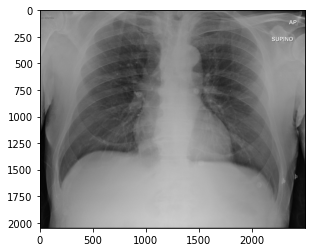

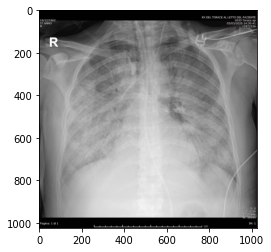

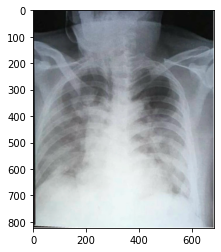

In [21]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x=0
for file in os.listdir(TARGET_DIR):
    img = mpimg.imread("dataset/covid/"+file)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #imgplot = plt.imshow(img)
    x+=1
    if(x==3):
        break


In [ ]:
# import random
# !rm dataset/train/covid/*
# !rm dataset/train/normal/*
# !rm dataset/train/pneumonia/*

# !rm dataset/validation/covid/*
# !rm dataset/validation/normal/*
# !rm dataset/validation/pneumonia/*

In [22]:
KAGGLE_FILE_PATH="kaggle/train/NORMAL"
TARGET_NORMAL_DIR="dataset/normal"

In [23]:
import random
image_names=os.listdir(KAGGLE_FILE_PATH)
random.shuffle(image_names)
print(cnt)

478


In [24]:
for i in range(cnt):
    image_name=image_names[i]
    image_path=os.path.join(KAGGLE_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)

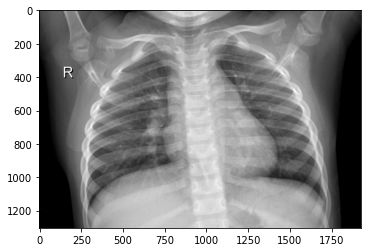

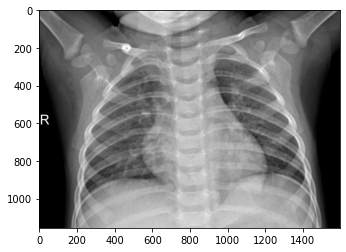

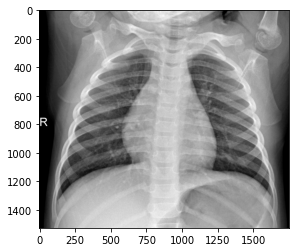

In [25]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

x=0
for file in os.listdir(TARGET_NORMAL_DIR):
    img = mpimg.imread("dataset/normal/"+file)
    plt.figure()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    #plt.imshow(img)
    x+=1
    if(x==3):
        break


In [26]:

COVID_FILE_PATH="dataset/covid"
TARGET_COVID_DIR="dataset/train/covid"
TARGET_COVID_VAL="dataset/validation/covid"
x=int(0.2*cnt)
y=cnt-x
image_names=os.listdir(COVID_FILE_PATH)
random.shuffle(image_names)

In [27]:

for i in range(y):
    image_name=image_names[i]
    image_path=os.path.join(COVID_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_COVID_DIR,image_name)
    shutil.copy2(image_path,target_path)
    
for i in range(x):
    image_name=image_names[y+i]
    image_path=os.path.join(COVID_FILE_PATH,image_name)
    target_path=os.path.join(TARGET_COVID_VAL,image_name)
    shutil.copy2(image_path,target_path)

In [28]:

FILE_PATH="dataset/normal"
TARGET_DIR="dataset/train/normal"
TARGET_VAL="dataset/validation/normal"
x=int(0.2*cnt)
y=cnt-x
image_names=os.listdir(FILE_PATH)
random.shuffle(image_names)

In [29]:

for i in range(y):
    image_name=image_names[i]
    image_path=os.path.join(FILE_PATH,image_name)
    target_path=os.path.join(TARGET_DIR,image_name)
    shutil.copy2(image_path,target_path)
    
for i in range(x):
    image_name=image_names[y+i]
    image_path=os.path.join(FILE_PATH,image_name)
    target_path=os.path.join(TARGET_VAL,image_name)
    shutil.copy2(image_path,target_path)

In [30]:

TRAIN_PATH="dataset/train"
VAL_PATH="dataset/validation"

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import pandas as pd
import shutil
import os
import matplotlib
%matplotlib inline
from keras.layers import Concatenate
from keras import Input
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,Activation,MaxPooling2D

from keras.callbacks import ModelCheckpoint


In [ ]:
#rm -rf `find -type d -name .ipynb_checkpoints`
 

In [66]:

train_datagen=image.ImageDataGenerator(rescale = 1./255., rotation_range = 20,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen=image.ImageDataGenerator(rescale = 1.0/255.)

In [67]:
train_generator=train_datagen.flow_from_directory(
    'dataset/train',target_size=(224,224),batch_size=32,class_mode='binary'
    )


Found 766 images belonging to 2 classes.


In [68]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [69]:
validation_generator=test_datagen.flow_from_directory(
    'dataset/validation',target_size=(224,224),batch_size=32,class_mode='binary',shuffle=False
    
)

Found 190 images belonging to 2 classes.


In [70]:
validation_generator.class_indices

{'covid': 0, 'normal': 1}

In [71]:
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode="auto",patience=3,restore_best_weights=True)

In [72]:
from keras.applications.inception_v3 import InceptionV3
model = InceptionV3(include_top=False,weights='imagenet',input_shape=(224,224,3))

for layer in model.layers:
    layer.trainable = False

In [73]:



add_model = Sequential()
add_model.add(model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dense(512,activation='relu'))
add_model.add(Dropout(0.3))
add_model.add(Dense(1, 
                    activation='softmax'))


model_new = add_model
model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 513       
Total params: 22,852,385
Trainable params: 1,049,601
Non-trainable params: 21,802,784
_________________________________________________________________


In [74]:

from tensorflow.keras.optimizers import RMSprop
model_new.compile(loss=keras.losses.binary_crossentropy,optimizer = RMSprop(lr=0.0001), metrics=['accuracy'])
hist=model_new.fit_generator( 
    train_generator,
    steps_per_epoch=24,epochs=25,validation_data=validation_generator,
    validation_steps=6,
    callbacks=[early_stop]
   )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
24/24 [==============================] - 142s 5s/step - loss: 0.3935 - accuracy: 0.8285 - val_loss: 0.0843 - val_accuracy: 0.9737
Epoch 2/25
24/24 [==============================] - 142s 6s/step - loss: 0.1132 - accuracy: 0.9642 - val_loss: 0.0764 - val_accuracy: 0.9737
Epoch 3/25
24/24 [==============================] - 122s 5s/step - loss: 0.0808 - accuracy: 0.9747 - val_loss: 0.0455 - val_accuracy: 0.9842
Epoch 4/25
24/24 [==============================] - 140s 6s/step - loss: 0.0641 - accuracy: 0.9783 - val_loss: 0.0352 - val_accuracy: 0.9895
Epoch 5/25
24/24 [==============================] - 143s 6s/step - loss: 0.0690 - accuracy: 0.9709 - val_loss: 0.0242 - val_accuracy: 0.9895
Epoch 6/25
24/24 [==============================] - 122s 5s/step - loss: 0.0478 - accuracy: 0.9814 - val_loss: 0.0249 - val_accuracy: 0.9895
Epoch 7/25
24/24 [==============================] - 123s 5s/step - loss: 0.0696 - accuracy: 0.9757 - val_loss: 0.0237 - val_accuracy: 0.9895
Epoch 8/25
24

In [76]:
model_new.save("modelt1.h5")

In [77]:
modelt=load_model('modelt1.h5')
modelt.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.04411120340228081, 0.977806806564331]

In [78]:
modelt.evaluate(validation_generator)

6/6 [==============================] - 24s 4s/step - loss: 0.0175 - accuracy: 0.9947


[0.01747124269604683, 0.9947368502616882]